In [1]:
!pip install requests bs4 pandas --quiet

In [2]:
import re
import requests
import json
import pandas as pd


from bs4 import BeautifulSoup

response = requests.get("https://understat.com/league/EPL/2024") #https://understat.com/match/26661 26658 26645 26635 26631 26621 26603
print(response.status_code)

200


In [3]:
print(response.content)

b'<!DOCTYPE html>\n<html>\n    <head>\n\t\t<base href="https://understat.com/">\n\t\t<title>EPL xG Table and Scorers for the 2024/2025 season | Understat.com</title>\n        <meta charset="UTF-8" />\n\t\t<meta name="description" content="xG table of EPL standings and top scorers for the 2024/2025 season, also tables from past seasons and other European football leagues.">\n\t\t<meta name="Keywords" content="EPL, xg table,scorers, expected goals table, season 2024/2025"> \n\t\t\t<link rel="apple-touch-icon" sizes="180x180" href="apple-touch-icon.png">\n\t<link rel="icon" type="image/png" sizes="32x32" href="favicon-32x32.png">\n\t<link rel="icon" type="image/png" sizes="16x16" href="favicon-16x16.png">\n\t<link rel="manifest" href="manifest.json">\n\t<link rel="mask-icon" href="safari-pinned-tab.svg" color="#5bbad5">\n\t<meta name="apple-mobile-web-app-title" content="understat">\n\t<meta name="application-name" content="understat">\n\t<meta name="theme-color" content="#ffffff">\n\t<me

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')
ugly_soup = str(soup)

In [5]:
teams_Data = re.search("var teamsData .*= JSON.parse\('(.*)'\)", ugly_soup).group(1) #shotsData
data = json.loads(teams_Data.encode('utf8').decode('unicode_escape'))

In [6]:
len(data)

20

In [7]:
data.keys()
variables = {}  # Empty dictionary to store variables

for i in data.keys():
    variables[i] = [data[i]['title']]  # Assigning the team name to the key

# Now you can access the variables like this:
print(variables['87'])  # Output: Liverpool

['Liverpool']


In [8]:
ID='87'

In [9]:
print(data[ID].keys())
(data[ID]['history'])

dict_keys(['id', 'title', 'history'])


[{'h_a': 'a',
  'xG': 3.92906,
  'xGA': 0.342601,
  'npxG': 3.92906,
  'npxGA': 0.342601,
  'ppda': {'att': 201, 'def': 23},
  'ppda_allowed': {'att': 338, 'def': 18},
  'deep': 13,
  'deep_allowed': 2,
  'scored': 2,
  'missed': 0,
  'xpts': 2.9562,
  'result': 'w',
  'date': '2024-08-17 11:30:00',
  'wins': 1,
  'draws': 0,
  'loses': 0,
  'pts': 3,
  'npxGD': 3.586459},
 {'h_a': 'h',
  'xG': 2.71877,
  'xGA': 0.457239,
  'npxG': 2.71877,
  'npxGA': 0.457239,
  'ppda': {'att': 233, 'def': 23},
  'ppda_allowed': {'att': 324, 'def': 10},
  'deep': 21,
  'deep_allowed': 2,
  'scored': 2,
  'missed': 0,
  'xpts': 2.7572,
  'result': 'w',
  'date': '2024-08-25 15:30:00',
  'wins': 1,
  'draws': 0,
  'loses': 0,
  'pts': 3,
  'npxGD': 2.261531},
 {'h_a': 'a',
  'xG': 2.10397,
  'xGA': 1.50087,
  'npxG': 2.10397,
  'npxGA': 1.50087,
  'ppda': {'att': 304, 'def': 26},
  'ppda_allowed': {'att': 275, 'def': 22},
  'deep': 9,
  'deep_allowed': 6,
  'scored': 3,
  'missed': 0,
  'xpts': 1.7849,


In [10]:
xga=0
xg=0

In [11]:
data['87']['history'][0]['xG']

3.92906

In [12]:
for i in (variables.keys()):
  xg=0
  xga=0
  pts = 0
  xpts = 0
  for j in range(len(data[i]['history'])):
    xg+=data[i]['history'][j]['xG']
    xga+=data[i]['history'][j]['xGA']
    xpts+=data[i]['history'][j]['xpts']
    pts+=data[i]['history'][j]['pts']
  variables[i].append(xg-xga)
  variables[i].append(xg)
  variables[i].append(xga)
  variables[i].append(xpts)
  variables[i].append(pts)

In [13]:
variables

{'71': ['Aston Villa', 5.151045000000002, 16.770759, 11.619714, 15.7101, 18],
 '72': ['Everton', -6.8580989999999975, 10.581101000000002, 17.4392, 7.925, 9],
 '73': ['Bournemouth',
  2.9267460000000014,
  16.312881,
  13.386135,
  14.997499999999999,
  12],
 '74': ['Southampton',
  -9.689979999999998,
  12.837919000000003,
  22.527899,
  7.737399999999999,
  1],
 '75': ['Leicester',
  -12.651696999999999,
  10.568332999999999,
  23.220029999999998,
  6.2001,
  9],
 '78': ['Crystal Palace',
  -4.8960589999999975,
  11.086491000000002,
  15.98255,
  9.2331,
  6],
 '80': ['Chelsea',
  5.096051000000001,
  18.290896,
  13.194844999999999,
  14.9496,
  17],
 '81': ['West Ham',
  -2.292345000000001,
  15.851657,
  18.144002,
  11.024199999999999,
  11],
 '82': ['Tottenham',
  9.612616000000003,
  19.299335000000003,
  9.686719,
  16.436700000000002,
  13],
 '83': ['Arsenal',
  6.5919190000000025,
  18.999038000000002,
  12.407119,
  14.6015,
  18],
 '86': ['Newcastle United',
  -2.7501649999

In [14]:
team_dict = {variables[key][0]: round(variables[key][1], 2) for key in variables}

# Output the new dictionary
print(team_dict)

{'Aston Villa': 5.15, 'Everton': -6.86, 'Bournemouth': 2.93, 'Southampton': -9.69, 'Leicester': -12.65, 'Crystal Palace': -4.9, 'Chelsea': 5.1, 'West Ham': -2.29, 'Tottenham': 9.61, 'Arsenal': 6.59, 'Newcastle United': -2.75, 'Liverpool': 11.98, 'Manchester City': 8.86, 'Manchester United': -1.87, 'Brighton': 1.45, 'Fulham': 8.3, 'Wolverhampton Wanderers': -8.82, 'Brentford': 1.18, 'Nottingham Forest': 3.01, 'Ipswich': -14.34}


In [15]:
team_xpts_dict = {variables[key][0]: round(variables[key][-1], 3) - round(variables[key][-2], 3) for key in variables}

# Output the new dictionary
print(team_xpts_dict)

{'Aston Villa': 2.289999999999999, 'Everton': 1.0750000000000002, 'Bournemouth': -2.997, 'Southampton': -6.737, 'Leicester': 2.8, 'Crystal Palace': -3.2330000000000005, 'Chelsea': 2.0500000000000007, 'West Ham': -0.023999999999999133, 'Tottenham': -3.437000000000001, 'Arsenal': 3.398999999999999, 'Newcastle United': 1.016, 'Liverpool': 1.9920000000000009, 'Manchester City': 5.484000000000002, 'Manchester United': -1.9529999999999994, 'Brighton': 1.6210000000000004, 'Fulham': -6.079000000000001, 'Wolverhampton Wanderers': -5.141, 'Brentford': 0.4269999999999996, 'Nottingham Forest': 2.2479999999999993, 'Ipswich': -1.3730000000000002}


In [16]:
sorted_xpts_team_dict = dict(sorted(team_xpts_dict.items(), key=lambda item: item[1], reverse=True))
sorted_xpts_team_dict

{'Manchester City': 5.484000000000002,
 'Arsenal': 3.398999999999999,
 'Leicester': 2.8,
 'Aston Villa': 2.289999999999999,
 'Nottingham Forest': 2.2479999999999993,
 'Chelsea': 2.0500000000000007,
 'Liverpool': 1.9920000000000009,
 'Brighton': 1.6210000000000004,
 'Everton': 1.0750000000000002,
 'Newcastle United': 1.016,
 'Brentford': 0.4269999999999996,
 'West Ham': -0.023999999999999133,
 'Ipswich': -1.3730000000000002,
 'Manchester United': -1.9529999999999994,
 'Bournemouth': -2.997,
 'Crystal Palace': -3.2330000000000005,
 'Tottenham': -3.437000000000001,
 'Wolverhampton Wanderers': -5.141,
 'Fulham': -6.079000000000001,
 'Southampton': -6.737}

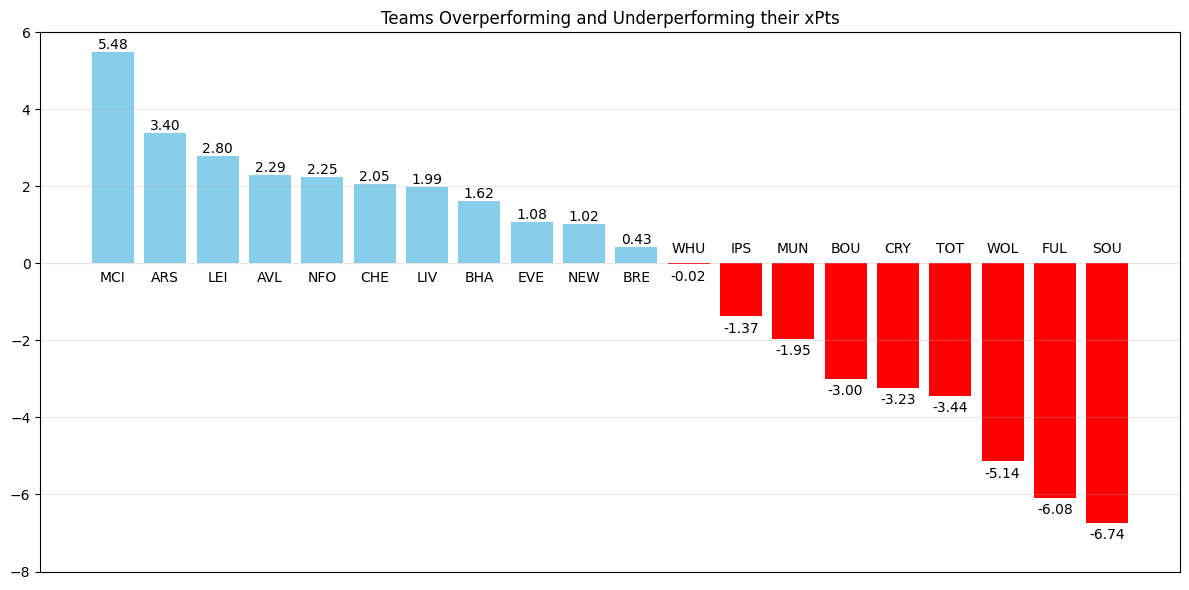

In [17]:
import matplotlib.pyplot as plt

short_team_names = {
    'Liverpool': 'LIV',
    'Fulham': 'FUL',
    'Tottenham': 'TOT',
    'Arsenal': 'ARS',
    'Chelsea': 'CHE',
    'Manchester City': 'MCI',
    'Aston Villa': 'AVL',
    'Bournemouth': 'BOU',
    'Brighton': 'BHA',
    'Manchester United': 'MUN',
    'Brentford': 'BRE',
    'Nottingham Forest': 'NFO',
    'West Ham': 'WHU',
    'Newcastle United': 'NEW',
    'Crystal Palace': 'CRY',
    'Southampton': 'SOU',
    'Everton': 'EVE',
    'Wolverhampton Wanderers': 'WOL',
    'Leicester': 'LEI',
    'Ipswich': 'IPS'
}

# Sort teams by values
sorted_teams = dict(sorted(sorted_xpts_team_dict.items(), key=lambda item: item[1], reverse=True))

# Extract short team names and values for plotting
teams_short = [short_team_names[team] for team in sorted_teams.keys()]
values = list(sorted_teams.values())

# Assign colors: red for negative values, skyblue for positive values
colors = ['red' if value < 0 else 'skyblue' for value in values]

# Create the vertical bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(teams_short, values, color=colors)

# Add team names on the y=0 line
for bar, value, team in zip(bars, values, teams_short):
    if value < 0:
        # Position team name above the bar
        plt.text(bar.get_x() + bar.get_width() / 2, 0.2, team,
                 va='bottom', ha='center', fontsize=10, color='black')
    else:
        # Position team name below the x-axis
        plt.text(bar.get_x() + bar.get_width() / 2, -0.2, team,
                 va='top', ha='center', fontsize=10, color='black')

# Add values above the bars
for bar, value in zip(bars, values):
    if value<0:
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{value:.2f}',
             va='bottom', ha='center', fontsize=10)
    else:
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}',
             va='bottom', ha='center', fontsize=10)

# Titles and labels
# plt.ylabel("Values")
plt.title("Teams Overperforming and Underperforming their xPts")
plt.grid(True, axis='y', linestyle='solid', alpha=0.3)
plt.xticks([])

# Set y-axis limits to ensure the labels are visible
plt.ylim(round(min(values)) - 1, round(max(values)) + 1)

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
sorted_team_dict = dict(sorted(team_dict.items(), key=lambda item: item[1], reverse=True))

In [19]:
sorted_team_dict

{'Liverpool': 11.98,
 'Tottenham': 9.61,
 'Manchester City': 8.86,
 'Fulham': 8.3,
 'Arsenal': 6.59,
 'Aston Villa': 5.15,
 'Chelsea': 5.1,
 'Nottingham Forest': 3.01,
 'Bournemouth': 2.93,
 'Brighton': 1.45,
 'Brentford': 1.18,
 'Manchester United': -1.87,
 'West Ham': -2.29,
 'Newcastle United': -2.75,
 'Crystal Palace': -4.9,
 'Everton': -6.86,
 'Wolverhampton Wanderers': -8.82,
 'Southampton': -9.69,
 'Leicester': -12.65,
 'Ipswich': -14.34}

In [20]:
xga

24.09479

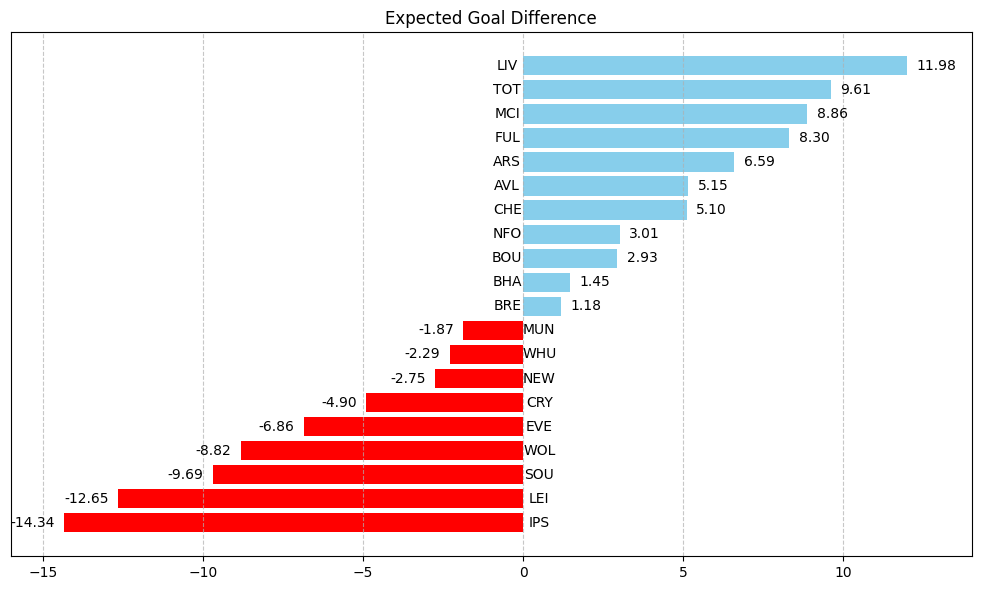

In [21]:
import matplotlib.pyplot as plt

# Shortform of team names
shortform_team_dict = {
    'Aston Villa': 'AVL', 'Everton': 'EVE', 'Bournemouth': 'BOU', 'Southampton': 'SOU',
    'Leicester': 'LEI', 'Crystal Palace': 'CRY', 'Chelsea': 'CHE', 'West Ham': 'WHU',
    'Tottenham': 'TOT', 'Arsenal': 'ARS', 'Newcastle United': 'NEW', 'Liverpool': 'LIV',
    'Manchester City': 'MCI', 'Manchester United': 'MUN', 'Brighton': 'BHA',
    'Fulham': 'FUL', 'Wolverhampton Wanderers': 'WOL', 'Brentford': 'BRE',
    'Nottingham Forest': 'NFO', 'Ipswich': 'IPS'
}

team_values = {shortform_team_dict[team]: value for team, value in team_dict.items()}

# Sort the team dict by values again for plotting
sorted_teams = dict(sorted(team_values.items(), key=lambda item: item[1]))

# Extract teams and values for plotting
teams = list(sorted_teams.keys())
values = list(sorted_teams.values())

# Assign colors: red for negative values, skyblue for positive
colors = ['red' if value < 0 else 'skyblue' for value in values]

# Plotting
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot with conditional colors
bars = plt.barh(teams, values, color=colors)

# Add team names along the middle vertical line (near zero)
for bar, team, value in zip(bars, teams, values):
    if value<0:
        plt.text(
            0.5,  # Position at the vertical middle line (x=0)
            bar.get_y() + bar.get_height() / 2,  # Vertically centered
            team,  # Team name
            va='center', ha='center',  # Align the text at the center
            color='black', fontsize=10
        )
    else:
        plt.text(
            -0.5,  # Position at the vertical middle line (x=0)
            bar.get_y() + bar.get_height() / 2,  # Vertically centered
            team,  # Team name
            va='center', ha='center',  # Align the text at the center
            color='black', fontsize=10
        )

# Add values to the right of positive bars and to the left of negative bars
for bar, value in zip(bars, values):
    if value < 0:
        # Place text to the left for negative values
        plt.text(
            bar.get_width() - 0.3,  # Adjust for the negative width
            bar.get_y() + bar.get_height() / 2,
            f'{value:.2f}',  # Format the value to 3 decimal places
            va='center', ha='right',  # Align text to the left
            color='black', fontsize=10
        )
    else:
        # Place text to the right for positive values
        plt.text(
            bar.get_width() + 0.3,  # Adjust for the positive width
            bar.get_y() + bar.get_height() / 2,
            f'{value:.2f}',  # Format the value to 3 decimal places
            va='center', ha='left',  # Align text to the right
            color='black', fontsize=10
        )

# plt.xlabel("Values")
plt.title("Expected Goal Difference")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove y-axis labels
plt.yticks([])

plt.xlim(round(min(values)) - 2, round(max(values)) + 2)

# Display the plot
plt.tight_layout()
plt.show()

In [23]:
# df = pd.DataFrame(data['a'])
# df.shape[0]

In [25]:
# df.head()

In [ ]:
# df['X']*=100
# df['Y']*=100

# **Shots Data**

In [26]:
import re
import requests
import json
import pandas as pd


from bs4 import BeautifulSoup
# a = [26661, 26658, 26645, 26635, 26631, 26621, 26603]
# response = requests.get("https://understat.com/match/26603") #https://understat.com/match/26661 26658 26645 26635 26631 26621 26603
# print(response.status_code)
# List of match IDs
a = [26662, 26658, 26645, 26635, 26631, 26621, 26603]

# List to store all shots data
all_shots_data = []

# Loop through the values in the list `a` and make requests
for match_id in a:
    url = f"https://understat.com/match/{match_id}"
    response = requests.get(url)

    # Parse the response with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    ugly_soup = str(soup)

    # Extract the shotsData using regex
    shots_data_match = re.search(r"var shotsData\s*= JSON.parse\('(.*)'\)", ugly_soup)
    if shots_data_match:
        shots_data_json = shots_data_match.group(1)

        # Decode and load the JSON data
        shots_data = json.loads(shots_data_json.encode('utf8').decode('unicode_escape'))

        # Append the extracted data to all_shots_data list
        all_shots_data.append(shots_data)

# Now `all_shots_data` contains the shots data from all matches in list `a`
print(all_shots_data)


[{'h': [{'id': '595227', 'minute': '46', 'result': 'SavedShot', 'X': '0.8719999694824219', 'Y': '0.34200000762939453', 'xG': '0.09813690185546875', 'player': 'Ismaila Sarr', 'h_a': 'h', 'player_id': '5675', 'situation': 'OpenPlay', 'season': '2024', 'shotType': 'RightFoot', 'match_id': '26662', 'h_team': 'Crystal Palace', 'a_team': 'Liverpool', 'h_goals': '0', 'a_goals': '1', 'date': '2024-10-05 11:30:00', 'player_assisted': 'Maxence Lacroix', 'lastAction': 'Throughball'}, {'id': '595232', 'minute': '63', 'result': 'SavedShot', 'X': '0.8219999694824218', 'Y': '0.46', 'xG': '0.06092464551329613', 'player': 'Eddie Nketiah', 'h_a': 'h', 'player_id': '6482', 'situation': 'OpenPlay', 'season': '2024', 'shotType': 'RightFoot', 'match_id': '26662', 'h_team': 'Crystal Palace', 'a_team': 'Liverpool', 'h_goals': '0', 'a_goals': '1', 'date': '2024-10-05 11:30:00', 'player_assisted': 'Jean-Philippe Mateta', 'lastAction': 'Pass'}, {'id': '595234', 'minute': '66', 'result': 'MissedShots', 'X': '0.75

In [ ]:
# soup = BeautifulSoup(response.content, 'html.parser')
# ugly_soup = str(soup)

In [ ]:
# shots_Data = re.search("var shotsData .*= JSON.parse\('(.*)'\)", ugly_soup).group(1) #shotsData
# data = json.loads(shots_Data.encode('utf8').decode('unicode_escape'))

In [ ]:
# (all_shots_data[0])

In [27]:
# liverpool_actions = [action for action in data['a'] if action['a_team'] == 'Liverpool'] #or data['h'] if action['h_team'] == 'Liverpool']
liverpool_actions = []
for data in all_shots_data:
  liverpool_actions.extend([action for action in data['h'] if action['h_team'] == 'Liverpool'])

  liverpool_actions.extend([action for action in data['a'] if action['a_team'] == 'Liverpool'])


# Print or process the filtered data
# print(json.dumps(liverpool_actions, indent=4))

In [28]:
data = pd.DataFrame(liverpool_actions)

In [29]:
data.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,595220,8,Goal,0.9030000305175782,0.495,0.4535486698150635,Diogo Jota,a,6854,OpenPlay,2024,RightFoot,26662,Crystal Palace,Liverpool,0,1,2024-10-05 11:30:00,Cody Gakpo,Pass
1,595221,27,MissedShots,0.789000015258789,0.7090000152587891,0.028052177280187607,Cody Gakpo,a,11296,OpenPlay,2024,RightFoot,26662,Crystal Palace,Liverpool,0,1,2024-10-05 11:30:00,Curtis Jones,Pass
2,595222,28,SavedShot,0.73,0.36400001525878906,0.020777888596057892,Trent Alexander-Arnold,a,1791,OpenPlay,2024,RightFoot,26662,Crystal Palace,Liverpool,0,1,2024-10-05 11:30:00,Ryan Gravenberch,Pass
3,595223,33,MissedShots,0.9109999847412109,0.534000015258789,0.45452094078063965,Diogo Jota,a,6854,OpenPlay,2024,RightFoot,26662,Crystal Palace,Liverpool,0,1,2024-10-05 11:30:00,Ryan Gravenberch,Pass
4,595224,33,BlockedShot,0.7980000305175782,0.7559999847412109,0.01813497394323349,Curtis Jones,a,6665,OpenPlay,2024,RightFoot,26662,Crystal Palace,Liverpool,0,1,2024-10-05 11:30:00,Cody Gakpo,Pass


In [30]:
data['xG'][0]

'0.4535486698150635'

In [31]:
df = data

In [32]:
df['xG'].shape[0]
for i in range(df['xG'].shape[0]):
  df['xG'][i] = float(df['xG'][i])

df['X'].shape[0]
for i in range(df['X'].shape[0]):
  df['X'][i] = float(df['X'][i])

df['Y'].shape[0]
for i in range(df['Y'].shape[0]):
  df['Y'][i] = float(df['Y'][i])

<ipython-input-32-c62ede3f85f7>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['xG'][i] = float(df['xG'][i])
<ipython-input-32-c62ede3f85f7>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

In [33]:
df['X']*=100
df['Y']*=100

In [34]:
# Calculate the stats we'll need to display
# 1. Total shots
# 2. Total goals
# 3. Total xG
# 4. xG per shot
# 5. Average distance of shots

total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
print(total_xG)
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()
print(points_average_distance, actual_average_distance)

16.59423530753702
86.78888886063187 15.853333367241774


In [35]:
total_shots

108

In [36]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = '/content/drive/MyDrive/arial.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [37]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.1 MB/s eta 0:00:00


In [38]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=0.15,
    line_color='white',
    linewidth=.75,
    axis=True, label=True,
    goal_alpha=1
)

# VerticalPitch()

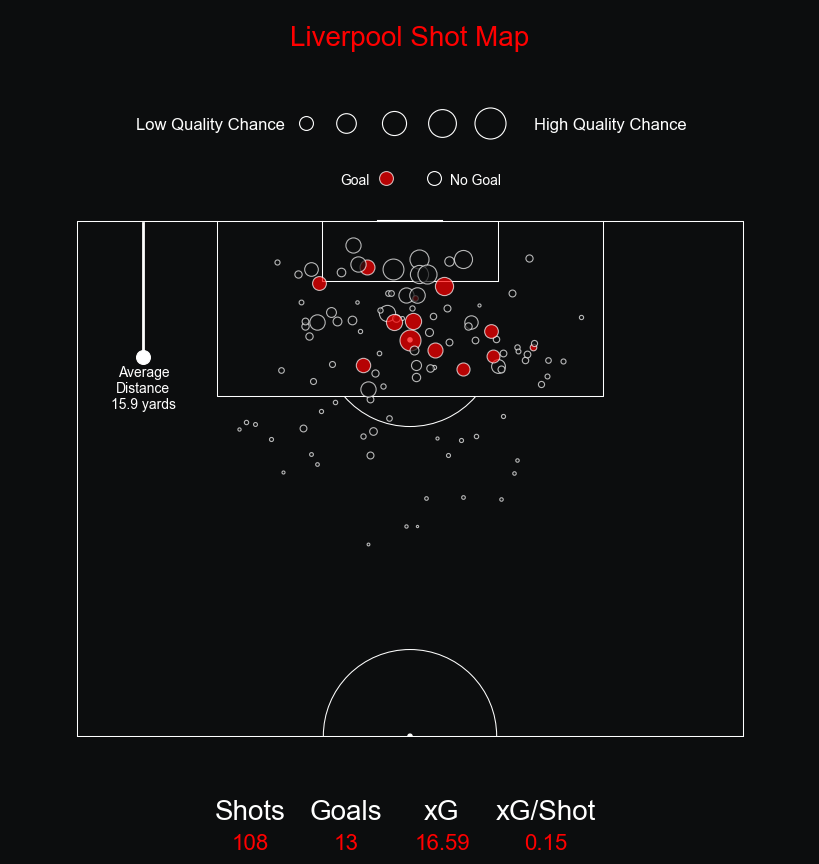

In [49]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Liverpool Shot Map',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='red',
    ha='center'
)
# ax1.text(
#     x=0.5,
#     y=.7,
#     s=f'Crystal Palace vs Liverpool',
#     fontsize=14,
#     fontweight='bold',
#     fontproperties=font_props,
#     color='white',
#     ha='center'
# )
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
    # marker = '*'
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.27, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_average_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [99.9, points_average_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_average_distance - 5,
    s=f'Average\nDistance\n{actual_average_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'] if x['result']!='Goal' else 300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white',
        # marker = '*' if x['result'] == 'Goal' else None
    )

ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.3,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.3,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='center'
)

ax3.text(
    x=0.42,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.42,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='center'
)

ax3.text(
    x=0.54,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.54,
    y=0,
    s=f'{total_xG:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='center'
)

ax3.text(
    x=0.67,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.67,
    y=0,
    s=f'{xG_per_shot:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='center'
)

ax3.set_axis_off()

In [ ]:
# !pip install soccerdata

In [ ]:
# import soccerdata as sd

In [ ]:
# five38 = sd.Sofascore('ENG-Premier League','1819')
# games = five38.read_league_table()
# games

In [50]:
!pip install understatapi --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.1/138.1 kB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.24.0 requires requests>=2.27.1, but you have requests 2.25.1 which is incompatible.
google-colab 1.0.0 requires request

In [51]:
import pandas as pd
import understatapi

client = understatapi.UnderstatClient()

In [52]:
player_data = client.player(player='1679').get_shot_data() #1250 Salah
player_data[0]

{'id': '158507',
 'minute': '88',
 'result': 'SavedShot',
 'X': '0.899000015258789',
 'Y': '0.6519999694824219',
 'xG': '0.09524309635162354',
 'player': 'Dominic Solanke',
 'h_a': 'h',
 'player_id': '1679',
 'situation': 'OpenPlay',
 'season': '2017',
 'shotType': 'LeftFoot',
 'match_id': '7134',
 'h_team': 'Liverpool',
 'a_team': 'Crystal Palace',
 'h_goals': '1',
 'a_goals': '0',
 'date': '2017-08-19 15:00:00',
 'player_assisted': 'Roberto Firmino',
 'lastAction': 'Pass'}

In [53]:
from datetime import datetime

# Sample array of JSON data

# Filter conditions
def filter_data(entry):
    # Convert the string date to a datetime object
    match_date = datetime.strptime(entry['date'], '%Y-%m-%d %H:%M:%S')
    cutoff_date = datetime(2024, 8, 16)  # The cutoff date is 16 August 2024

    # Check if the date is after 16 August 2024
    if match_date > cutoff_date:
        # Check if Liverpool is the home team or away team based on 'h_a'
        # if (entry['h_a'] == 'h' and entry['h_team'] == 'Liverpool') or (entry['h_a'] == 'a' and entry['a_team'] == 'Liverpool'):
        return True
    return False

# Iterate over the array of JSON objects and filter the correct values
filtered_data = [entry for entry in player_data if filter_data(entry)]

# Print or process the filtered results
print(filtered_data)


[{'id': '585647', 'minute': '7', 'result': 'SavedShot', 'X': '0.9269999694824219', 'Y': '0.5679999923706055', 'xG': '0.2220737487077713', 'player': 'Dominic Solanke', 'h_a': 'a', 'player_id': '1679', 'situation': 'FromCorner', 'season': '2024', 'shotType': 'Head', 'match_id': '26611', 'h_team': 'Leicester', 'a_team': 'Tottenham', 'h_goals': '1', 'a_goals': '1', 'date': '2024-08-19 19:00:00', 'player_assisted': 'Son Heung-Min', 'lastAction': 'Cross'}, {'id': '585649', 'minute': '13', 'result': 'SavedShot', 'X': '0.914000015258789', 'Y': '0.4620000076293945', 'xG': '0.05033301189541817', 'player': 'Dominic Solanke', 'h_a': 'a', 'player_id': '1679', 'situation': 'SetPiece', 'season': '2024', 'shotType': 'Head', 'match_id': '26611', 'h_team': 'Leicester', 'a_team': 'Tottenham', 'h_goals': '1', 'a_goals': '1', 'date': '2024-08-19 19:00:00', 'player_assisted': 'Pedro Porro', 'lastAction': 'Aerial'}, {'id': '585657', 'minute': '54', 'result': 'SavedShot', 'X': '0.8690000152587891', 'Y': '0.43

In [54]:
data = pd.DataFrame(filtered_data)

In [55]:
data

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,585647,7,SavedShot,0.9269999694824219,0.5679999923706055,0.2220737487077713,Dominic Solanke,a,1679,FromCorner,2024,Head,26611,Leicester,Tottenham,1,1,2024-08-19 19:00:00,Son Heung-Min,Cross
1,585649,13,SavedShot,0.914000015258789,0.4620000076293945,0.05033301189541817,Dominic Solanke,a,1679,SetPiece,2024,Head,26611,Leicester,Tottenham,1,1,2024-08-19 19:00:00,Pedro Porro,Aerial
2,585657,54,SavedShot,0.8690000152587891,0.43099998474121093,0.11838139593601227,Dominic Solanke,a,1679,OpenPlay,2024,RightFoot,26611,Leicester,Tottenham,1,1,2024-08-19 19:00:00,Pape Sarr,Pass
3,591315,27,MissedShots,0.9319999694824219,0.43900001525878907,0.12555593252182007,Dominic Solanke,h,1679,OpenPlay,2024,Head,26640,Tottenham,Arsenal,0,1,2024-09-15 13:00:00,James Maddison,Cross
4,591318,47,BlockedShot,0.9059999847412109,0.4420000076293945,0.07831829786300659,Dominic Solanke,h,1679,OpenPlay,2024,Head,26640,Tottenham,Arsenal,0,1,2024-09-15 13:00:00,Brennan Johnson,Cross
5,592495,7,Goal,0.92,0.47,0.47913888096809387,Dominic Solanke,h,1679,OpenPlay,2024,RightFoot,26648,Tottenham,Brentford,3,1,2024-09-21 14:00:00,None,Rebound
6,592505,31,BlockedShot,0.975,0.5370000076293945,0.8213521838188171,Dominic Solanke,h,1679,OpenPlay,2024,LeftFoot,26648,Tottenham,Brentford,3,1,2024-09-21 14:00:00,James Maddison,Pass
7,592513,52,BlockedShot,0.9159999847412109,0.47299999237060547,0.45318442583084106,Dominic Solanke,h,1679,OpenPlay,2024,LeftFoot,26648,Tottenham,Brentford,3,1,2024-09-21 14:00:00,None,Rebound
8,592512,52,SavedShot,0.9180000305175782,0.4590000152587891,0.45672929286956787,Dominic Solanke,h,1679,OpenPlay,2024,RightFoot,26648,Tottenham,Brentford,3,1,2024-09-21 14:00:00,None,TakeOn
9,594807,55,SavedShot,0.865999984741211,0.5270000076293946,0.37643444538116455,Dominic Solanke,a,1679,OpenPlay,2024,LeftFoot,26660,Manchester United,Tottenham,0,3,2024-09-29 15:30:00,None,Rebound


In [56]:
df = data

In [57]:
df['xG'].shape[0]
for i in range(df['xG'].shape[0]):
  df['xG'][i] = float(df['xG'][i])

df['X'].shape[0]
for i in range(df['X'].shape[0]):
  df['X'][i] = float(df['X'][i])

df['Y'].shape[0]
for i in range(df['Y'].shape[0]):
  df['Y'][i] = float(df['Y'][i])

<ipython-input-57-c62ede3f85f7>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['xG'][i] = float(df['xG'][i])
<ipython-input-57-c62ede3f85f7>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

In [58]:
df['X']*=100
df['Y']*=100

In [59]:
# Calculate the stats we'll need to display
# 1. Total shots
# 2. Total goals
# 3. Total xG
# 4. xG per shot
# 5. Average distance of shots

total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
print(total_xG)
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
actual_average_distance = 120 - (df['X'] * 1.2).mean()
print(points_average_distance, actual_average_distance)

4.560364969074726
90.97999979654948 10.824000244140592


In [60]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = '/content/drive/MyDrive/arial.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [61]:
!pip install mplsoccer

In [62]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=0.15,
    line_color='white',
    linewidth=.75,
    axis=True, label=True,
    goal_alpha=1
)

# VerticalPitch()

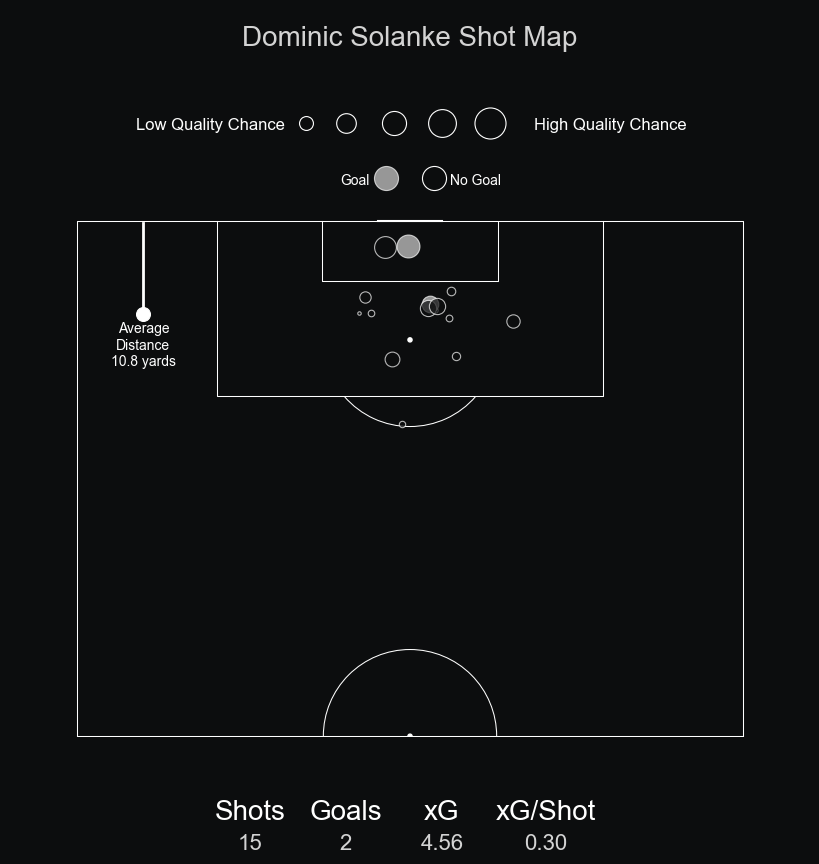

In [63]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Dominic Solanke Shot Map',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='lightgray',
    ha='center'
)
# ax1.text(
#     x=0.5,
#     y=.7,
#     s=f'Crystal Palace vs Liverpool',
#     fontsize=14,
#     fontweight='bold',
#     fontproperties=font_props,
#     color='white',
#     ha='center'
# )
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=300,
    color='lightgray',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
    # marker = '*'
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.27, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_average_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [99.9, points_average_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_average_distance - 5,
    s=f'Average\nDistance\n{actual_average_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'] if x['result']!='Goal' else 300 * x['xG'],
        color='lightgray' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white',
        # marker = '*' if x['result'] == 'Goal' else None
    )

ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.3,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.3,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='lightgray',
    ha='center'
)

ax3.text(
    x=0.42,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.42,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='lightgray',
    ha='center'
)

ax3.text(
    x=0.54,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.54,
    y=0,
    s=f'{total_xG:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='lightgray',
    ha='center'
)

ax3.text(
    x=0.67,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)

ax3.text(
    x=0.67,
    y=0,
    s=f'{xG_per_shot:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='lightgray',
    ha='center'
)

ax3.set_axis_off()

In [64]:
!pip install  mplsoccer